In [2]:
%load_ext autoreload
%matplotlib inline

In [27]:
%autoreload 2

import sys,os,glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pprint import pprint
from matplotlib.colors import LogNorm

thismodule = sys.modules[__name__]

# CACATOES

In [4]:
path_rceca = '/homedata/fiolleau/RCE/CACATOES'
filenames_rceca = glob.glob(os.path.join(path_rceca,'*'))
pprint(filenames_rceca)

['/homedata/fiolleau/RCE/CACATOES/cacatoes_rcemip_MESONH_RCE_large295_2D.nc',
 '/homedata/fiolleau/RCE/CACATOES/cacatoes_rcemip_MESONH_RCE_large300_2D.nc',
 '/homedata/fiolleau/RCE/CACATOES/cacatoes_rcemip_SAM_RCE_large300_2D.nc',
 '/homedata/fiolleau/RCE/CACATOES/cacatoes_rcemip_MESONH_RCE_large305_2D.nc',
 '/homedata/fiolleau/RCE/CACATOES/cacatoes_rcemip_SAM_RCE_large300_2D_old.nc',
 '/homedata/fiolleau/RCE/CACATOES/cacatoes_rcemip_SAM_RCE_large305_2D.nc',
 '/homedata/fiolleau/RCE/CACATOES/cacatoes_rcemip_SAM_RCE_large295_2D.nc']


In [5]:
data_sam_rce_cct = xr.open_dataset(os.path.join(path_rceca,'cacatoes_rcemip_SAM_RCE_large300_2D.nc'))
data_sam_rce_cct

<xarray.Dataset>
Dimensions:                       (CondPrecip: 17, MCS: 150, X: 62, Y: 4, time: 26)
Coordinates:
  * time                          (time) timedelta64[ns] 0 days ... 25 days
  * CondPrecip                    (CondPrecip) int16 0 1 2 3 4 ... 25 30 35 40
Dimensions without coordinates: MCS, X, Y
Data variables:
    Ygrid                         (Y) float32 ...
    Xgrid                         (X) float32 ...
    DAILYmcs_Pop                  (time, Y, X) float32 ...
    DAILY_OLR                     (time, Y, X) float32 ...
    DAILY_precip                  (time, Y, X) float32 ...
    DAILY_conditionalprecip       (time, CondPrecip, Y, X) float32 ...
    DAILYprecipfrac               (time, CondPrecip, Y, X) float32 ...
    QCcacatoes_nbpixels           (time, Y, X) float64 ...
    QCcacatoes_SurfGridPoint      (time, Y, X) float64 ...
    QCmcs_label                   (time, MCS, Y, X) float64 ...
    QCmcs_flag                    (time, MCS, Y, X) float64 ...
    INT_duration                  (time, MCS, Y, X) float32 ...
    INIT_time                     (time, MCS, Y, X) float32 ...
    INIT_j                        (time, MCS, Y, X) float32 ...
    INIT_i                        (time, MCS, Y, X) float32 ...
    END_time                      (time, MCS, Y, X) float32 ...
    END_j                         (time, MCS, Y, X) float32 ...
    END_i                         (time, MCS, Y, X) float32 ...
    INT_vavg                      (time, MCS, Y, X) float32 ...
    INT_distance                  (time, MCS, Y, X) float32 ...
    INT_OLRmin                    (time, MCS, Y, X) float32 ...
    INT_surfmaxkm2_235K           (time, MCS, Y, X) float32 ...
    INT_surfmaxkm2_220K           (time, MCS, Y, X) float32 ...
    INT_surfmaxkm2_210K           (time, MCS, Y, X) float32 ...
    INT_surfmaxkm2_200K           (time, MCS, Y, X) float32 ...
    INT_Scum                      (time, MCS, Y, X) float32 ...
    INT_surfmaxkm2_00mmh          (time, MCS, Y, X) float32 ...
    INT_surfmaxkm2_02mmh          (time, MCS, Y, X) float32 ...
    INT_surfmaxkm2_05mmh          (time, MCS, Y, X) float32 ...
    INT_surfmaxkm2_10mmh          (time, MCS, Y, X) float32 ...
    INT_surfMCS                   (time, MCS, Y, X) float32 ...
    INT_gridfraction_235K         (time, MCS, Y, X) float32 ...
    INT_gridfraction_220K         (time, MCS, Y, X) float32 ...
    INT_gridfraction_210K         (time, MCS, Y, X) float32 ...
    INT_gridfraction_200K         (time, MCS, Y, X) float32 ...
    INT_gridtimeOccupation_start  (time, MCS, Y, X) float64 ...
    INT_gridtimeOccupation_end    (time, MCS, Y, X) float64 ...
    INT_surfFraction_235K         (time, MCS, Y, X) float32 ...
    INT_surfFraction_220K         (time, MCS, Y, X) float32 ...
    INT_surfFraction_210K         (time, MCS, Y, X) float32 ...
    INT_surfFraction_200K         (time, MCS, Y, X) float32 ...

In [6]:
data_sam_rce_cct.QCcacatoes_SurfGridPoint[0]

<xarray.DataArray 'QCcacatoes_SurfGridPoint' (Y: 4, X: 62)>
array([[470448., 484704., 470448., ..., 470448., 470448., 213840.],
       [484704., 499392., 484704., ..., 484704., 484704., 220320.],
       [470448., 484704., 470448., ..., 470448., 470448., 213840.],
       [399168., 411264., 399168., ..., 399168., 399168., 181440.]])
Coordinates:
    time     timedelta64[ns] 00:00:00
Dimensions without coordinates: Y, X
Attributes:
    units:        km2
    description:  Cumulated RCEMIP pixels surface area into a CACATOES 1deg. ...

In [7]:
# colorbar
def showColorBar(ax,im,lab):
    x,y,w,h = ax.get_position().bounds
    dx = w/60
    cax = plt.axes([x+w+2*dx,y,dx,h])
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.ax.set_ylabel(lab)
    

0 DAILYmcs_Pop
1 DAILY_OLR
2 DAILY_precip
3 QCcacatoes_nbpixels
4 QCcacatoes_SurfGridPoint


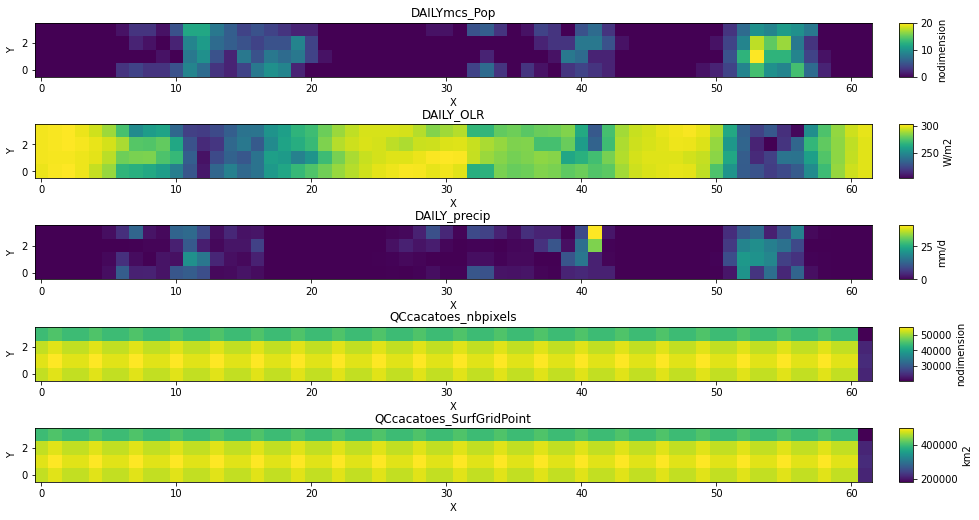

In [8]:
i_t = 3

varids_xyt = 'DAILYmcs_Pop','DAILY_OLR','DAILY_precip','QCcacatoes_nbpixels','QCcacatoes_SurfGridPoint'

N = len(varids_xyt)

fig,axs = plt.subplots(nrows=N,figsize=(15,2*N-1))

for i_ax,varid in zip(list(range(N)),varids_xyt):

    print(i_ax,varid)
    ax = axs[i_ax]
    units = data_sam_rce_cct[varid].units
    im = ax.imshow(data_sam_rce_cct[varid][i_t].data,origin='lower')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(varid)
    showColorBar(ax,im,units)


# SAM data

In [9]:
# Full files SAM
path_rce = '/bdd/MT_WORKSPACE/REMY/RCEMIP/SAM/300K'
filenames_rce = glob.glob(os.path.join(path_rce,'*'))
pprint(filenames_rce)

['/bdd/MT_WORKSPACE/REMY/RCEMIP/SAM/300K/rcemip_large_2048x128x74_3km_12s_300K_64.2Dcom_1.nc',
 '/bdd/MT_WORKSPACE/REMY/RCEMIP/SAM/300K/rcemip_large_2048x128x74_3km_12s_300K_64.2Dcom_2.nc',
 '/bdd/MT_WORKSPACE/REMY/RCEMIP/SAM/300K/3Dfiles',
 '/bdd/MT_WORKSPACE/REMY/RCEMIP/SAM/300K/rcemip_large_2048x128x74_3km_12s_300K.nc']


In [10]:
! ls -lh /bdd/MT_WORKSPACE/REMY/RCEMIP/SAM/300K/rcemip_large_2048x128x74_3km_12s_300K_64.2Dcom_1.nc

-rwxr-xr-x 1 cmuller lmd 68G Mar 16  2022 /bdd/MT_WORKSPACE/REMY/RCEMIP/SAM/300K/rcemip_large_2048x128x74_3km_12s_300K_64.2Dcom_1.nc


In [11]:
# Files with only one variable 
path_rce2load = '/data/bfildier/simulations/RCEMIP/SAM/300K/2D'
filenames_rce2load = glob.glob(os.path.join(path_rce2load,'*'))
filenames_rce2load

['/data/bfildier/simulations/RCEMIP/SAM/300K/2D/Prec_rcemip_large_2048x128x74_3km_12s_300K_64.2Dcom.nc',
 '/data/bfildier/simulations/RCEMIP/SAM/300K/2D/TB_rcemip_large_2048x128x74_3km_12s_300K_64.2Dcom.nc']

In [12]:
! ls -lh /data/bfildier/simulations/RCEMIP/SAM/300K/2D/Prec_rcemip_large_2048x128x74_3km_12s_300K_64.2Dcom.nc

-rw-r--r-- 1 bfildier mesouser 1.2G Feb 24 19:12 /data/bfildier/simulations/RCEMIP/SAM/300K/2D/Prec_rcemip_large_2048x128x74_3km_12s_300K_64.2Dcom.nc


In [13]:
varids2load = 'Prec','TB'

for varid in varids2load:
    
    data = xr.open_dataset(os.path.join(path_rce2load,'%s_rcemip_large_2048x128x74_3km_12s_300K_64.2Dcom.nc'%varid))
    setattr(thismodule,'%s_data'%varid,data)
    
Prec_data

<xarray.Dataset>
Dimensions:  (time: 1201, x: 2048, y: 128)
Coordinates:
  * time     (time) float32 75.0 75.02 75.04 75.06 ... 99.94 99.96 99.98 100.0
  * x        (x) float32 0.0 3e+03 6e+03 9e+03 ... 6.135e+06 6.138e+06 6.141e+06
  * y        (y) float32 0.0 3e+03 6e+03 9e+03 ... 3.75e+05 3.78e+05 3.81e+05
Data variables:
    Prec     (time, y, x) float32 ...
Attributes:
    history:  Fri Feb 24 19:12:17 2023: ncrcat Prec_rcemip_large_2048x128x74_...
    NCO:      netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, C...

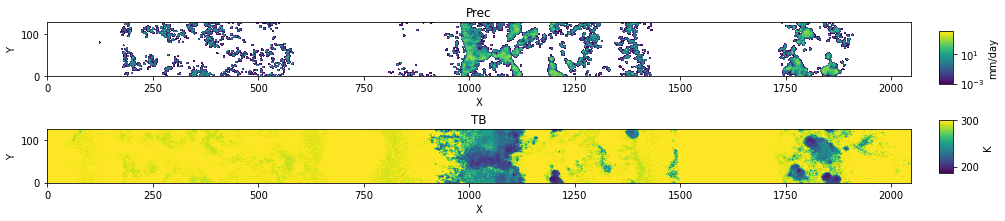

In [52]:
i_t = 40
varids2show = 'Prec','TB'
N = len(varids2show)

fig,axs = plt.subplots(nrows=N,figsize=(15,2*N-1))


for ax, varid in zip(axs,varids2show):

    data = getattr(thismodule,"%s_data"%varid)
    units = data[varid].units
    norm = None
    if varid == 'Prec':
        norm = LogNorm(vmin=1e-3, vmax=1e4)
    im = ax.imshow(data[varid][i_t].data,origin='lower',norm=norm)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(varid)
    showColorBar(ax,im,units)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.6) # changed
plt.show()

# Make movie of precip at native resolution and at 1ºx1day resolution

In [20]:
N_frames_per_day = 96
N_days_per_movie_second = 0.5
interval = int(1000 / N_frames_per_day / N_days_per_movie_second)

data_native = Prec_data.Prec
data_coarse = data_sam_rce_cct.DAILY_precip

time_native = data_native.time
time_coarse = data_coarse.time

def getIndTimeCoarse(i_t_native):

    t_native = time_native[i_t_native].data
    dt_native = t_native - time_native[0].data
    i_t_coarse = int(dt_native)

    return i_t_coarse

# colorbar
def showColorBar(ax,im,lab):
    x,y,w,h = ax.get_position().bounds
    dx = w/60
    cax = plt.axes([x+w+2*dx,y,dx,h])
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.ax.set_ylabel(lab)

In [21]:
import matplotlib.animation as animation
from functools import partial
import datetime as dt

In [22]:
def initFigure(var1,var2,varname1,varname2,norm1=None,norm2=None):
    
    fig,axs = plt.subplots(nrows=2,figsize=(15,5))

    ims = []
    
    for ax, var, varname, norm in zip(axs,[var1,var2],[varname1,varname2],[norm1,norm2]):

        units = var.units
        im = ax.imshow(var.data,origin='lower',norm=norm)
        ims.append(im)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title(varname)
        showColorBar(ax,im,units)
        

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=-0.4) # changed
    
    return fig, axs, ims

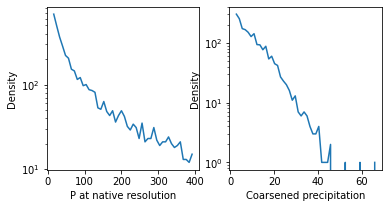

In [49]:
# Check that averaging keeps approximately the same distribution shape

h_native,b_native = np.histogram(data_native[100],bins=np.linspace(0,400,51))
h_coarse, b_coarse = np.histogram(data_coarse,bins=50)

fig,axs = plt.subplots(ncols=2,figsize=(6,))
axs[0].plot(b_native[2:-1],h_native[2:])
axs[1].plot(b_coarse[2:-1],h_coarse[2:])
axs[0].set_xlabel('P at native resolution')
axs[1].set_xlabel('Coarsened precipitation')
for ax in axs:
    ax.set_yscale('log')
    ax.set_ylabel('Density')
plt.show()

In [55]:
def makeMovie():

    Nt = len(time_native)

    # -- initialize figure

    i_t_0 = 0
    t_0 = time_native[i_t_0]
    i_t_0_coarse = getIndTimeCoarse(i_t_0)

    var1 = data_native
    var2 = data_coarse

    title1_root = 'P at native resolution, time = %2.2f'
    title2_root = 'P at 1ºx1day, time = %d'

    # figure
    norm1 = LogNorm(vmin=1e-3, vmax=1e4)
    norm2 = LogNorm(vmin=1e-4, vmax=1e3)
    fig, axs, ims = initFigure(var1[i_t_0],var2[i_t_0_coarse],title1_root%t_0,title2_root%i_t_0_coarse,norm1=norm1,norm2=norm2)

    # # show advancement
    # i_t_print = 0
    # print(i_t_print,end=' ')
    
    # -- define movie loop
    def updateImage(i_t):
        
        t = time_native[i_t]
        i_t_coarse = getIndTimeCoarse(i_t)

        # if i_t_coarse > i_t_print:
        #     i_t_print = i_t_coarse
        #     print(i_t_print,end=' ')
        print(i_t,end=' ')
        
        # update images
        var1_t = var1[i_t].data
        var2_t = var2[i_t_coarse].data
        ims[0].set_data(var1_t)
        ims[1].set_data(var2_t)
        axs[0].set_title(title1_root%t)
        axs[1].set_title(title2_root%i_t_coarse)

        return [ims]


#     # -- make movie
#     # create
#     # updateImage_ = partial(updateImage, cfg=cfg_merged)
#     # ani = animation.FuncAnimation(fig, updateImage_, Nt,
#     #                               interval=cfg.output.movies.speed_factor/delta_t,
#     #                               blit=True)
#     # writer = animation.writers['ffmpeg'](fps=cfg.output.movies.speed_factor/delta_t,
#     #                                      metadata={"comment":f"created on {dt.datetime.now().strftime('%Y%m%d %H:%M')}"}
#     #                                      )
#     updateImage_ = partial(updateImage)
#     ani = animation.FuncAnimation(fig, updateImage_, Nt,
#                                   blit=True)
#     writer = animation.writers['ffmpeg'](fps=cfg.output.movies.speed_factor/delta_t,
#                                          metadata={"comment":f"created on {dt.datetime.now().strftime('%Y%m%d %H:%M')}"}
#                                          )

#     # save
#     # outputdir = cfg.output.movies.directory
#     outputdir = '../output/'
#     os.makedirs(outputdir, exist_ok=True)

#     moviename = 'prec_two_resolutions'
#     moviefile = os.path.join(outputdir, '%s.mp4'%(movie_name))
#     # print(cfg.output.movies.dpi)
#     dpi = 300
#     ani.save(moviefile, writer=writer, dpi=dpi)

#     plt.close()

    anim = animation.FuncAnimation(fig, updateImage,
                                   frames=range(0,Nt), interval=interval, blit=False)

    writer = animation.writers['ffmpeg'](fps=3)
    # mywriter = animation.FFMpegWriter(fps=3, extra_args=['-vcodec', 'libx264'])

    anim.save(movie_path,writer=writer)#,savefig_kwargs={'bbox_inches':'tight'})

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 

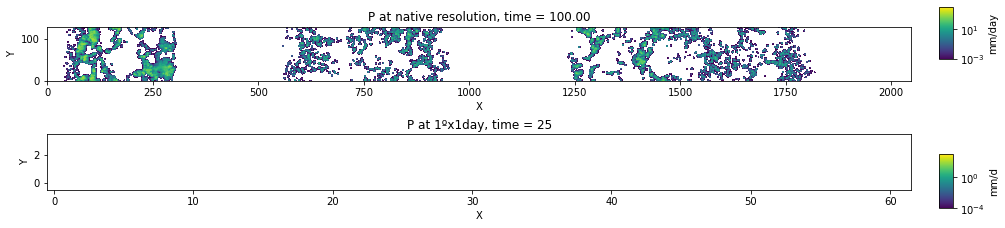

In [56]:
outputdir = '../output/'
movie_name = 'prec_two_resolutions'
movie_path = os.path.join(outputdir, '%s.mp4'%(movie_name))
makeMovie()